# Quickstart: running DYNAMITE

By the end of the notebook, you will have run a Schwarzschild model. This will involve the following steps:
1. run a small grid of orbit-based models with DYNAMITE
2. understand the structure of the output
2. plot the output

You should run this from the directory ``docs/tutorial_notebooks``.

## Setup

We will run DYNAMITE on CALIFA data of NGC 6278. To prepare the input data files, you should first run the tutorial "Data Preparation for Gauss Hermite kinematics" (``data_prep_for_gauss_hermites.ipynb``). The relevant files you need for this tutorial are:

```
| tutorial_notebooks
| ├── NGC6278_input     
| │   ├── dynamite_input                
| │   │   ├── gauss_hermite_kins.ecsv
| │   │   ├── aperture.dat
| │   │   ├── bins.dat 
| │   │   ├── mge.ecsv
| │   │   └── ...
| │   └── ...
| │   └── ...
| └── NGC6278_config.yaml
| └── *.ipynb
|
```

## Read the configuration file 

In [1]:
import dynamite as dyn

print('DYNAMITE')
print('    version', dyn.__version__)
print('    installed at ', dyn.__path__)

fname = 'NGC6278_config.yaml'
c = dyn.config_reader.Configuration(fname, reset_logging=True)

[INFO] 16:15:07 - dynamite.config_reader.Configuration - Config file NGC6278_config.yaml read.
[INFO] 16:15:07 - dynamite.config_reader.Configuration - io_settings...
[INFO] 16:15:07 - dynamite.config_reader.Configuration - system_attributes...
[INFO] 16:15:07 - dynamite.config_reader.Configuration - model_components...
[INFO] 16:15:08 - dynamite.config_reader.Configuration - system_parameters...
[INFO] 16:15:08 - dynamite.config_reader.Configuration - orblib_settings...
[INFO] 16:15:08 - dynamite.config_reader.Configuration - weight_solver_settings...
[INFO] 16:15:08 - dynamite.config_reader.Configuration - parameter_space_settings...
[INFO] 16:15:08 - dynamite.config_reader.Configuration - multiprocessing_settings...
[INFO] 16:15:08 - dynamite.config_reader.Configuration - ... using 4 CPUs.
[INFO] 16:15:08 - dynamite.config_reader.Configuration - legacy_settings...
[INFO] 16:15:08 - dynamite.config_reader.Configuration - System assembled
[INFO] 16:15:08 - dynamite.config_reader.Confi

DYNAMITE
    version 0.0.0
    installed at  ['/usr/local/lib/python3.9/site-packages/dynamite-0.0.0-py3.9.egg/dynamite']


[INFO] 16:15:08 - dynamite.config_reader.Configuration - Instantiated AllModels object
[INFO] 16:15:08 - dynamite.config_reader.Configuration - Config file backup: NGC6278_output/NGC6278_config_007.yaml


All the options in the configuration file are held in the object `c`. For example, let's look at the `io_settings`. Output from this tutorial will be saved in the `output_directory`.

In [2]:
c.settings.io_settings

{'input_directory': 'NGC6278_input/dynamite_input/',
 'output_directory': 'NGC6278_output/',
 'all_models_file': 'all_models.ecsv',
 'model_directory': 'NGC6278_output/models/',
 'plot_directory': 'NGC6278_output/plots/'}

In fact, by creating the configuration object `c`, we have also created the `output_directory` and copied a version of the configuration file there,

In [3]:
ls NGC6278_output

all_models.ecsv          NGC6278_config_002.yaml  NGC6278_config_006.yaml
models/                  NGC6278_config_003.yaml  NGC6278_config_007.yaml
NGC6278_config_000.yaml  NGC6278_config_004.yaml  plots/
NGC6278_config_001.yaml  NGC6278_config_005.yaml


## Run the models

Making the `ModelIterator` object will start running a grid of orbit-based models. This next step will take about 10 minutes using 4 cpus  

In [4]:
import time

t = time.perf_counter()

smi = dyn.model_iterator.ModelIterator(
    system=c.system,
    all_models=c.all_models,
    settings=c.settings)

delta_t = time.perf_counter()-t
print(f'Computation time: {delta_t} seconds = {delta_t/60} minutes')

[INFO] 16:15:08 - dynamite.model_iterator.ModelIterator - Stopping at iteration 5


Computation time: 0.005014143000153126 seconds = 8.35690500025521e-05 minutes


The following files have been created in the models directory,

In [5]:
ls NGC6278_output/models

orblib_000_000/  orblib_001_001/  orblib_003_000/
orblib_001_000/  orblib_002_000/  orblib_003_001/


Each directory holds a different orbit library 

    orblib_XXX_YYY

where `XXX` labels the iteration when it was created, and `YYY` labels the position within that iteration. Looking inside one of these directories, we see the following files:

In [6]:
ls NGC6278_output/models/orblib_000_000

cmd_box_orbs  cmd_nnls_5.0  cmd_orb_start  fort.30       ml1.00/  ml7.00/
cmd_nnls_1.0  cmd_nnls_7.0  cmd_tube_orbs  infil/        ml3.00/  ml9.00/
cmd_nnls_3.0  cmd_nnls_9.0  datfil/        interpolgrid  ml5.00/


which are:

- `cmd_*`: bash scripts for running Fortran programs
- `datfil/`: directory holding the orbit library for the reference potential
- `infil/`: input files for running Fortran programs
- `ml*/`: directories containing output orbital weights (and other results) for different values of `ml`

Each `ml*` directory hold outputs for a re-scaled version of the same potential, where the value of `ml` is a mass scaling applied to a reference potential. The reference potential uses the the first value of `ml` encountered in the parameter search.

Some plots are automatically created,

In [7]:
ls NGC6278_output/plots

anisotropy_var.png        kinchi2_plot.png           orbit_linear_only.png
betaz_var.png             kinchi2_progress_plot.png  triaxial_qpt.png
enclosedmassm_linear.png  kinematic_map_califa.png


and they represent the following quantities:

1. `kinchi2_progress_plot` : chi2 values vs model ID
<img src="NGC6278_output/plots/kinchi2_progress_plot.png" width="400">

2. `kinchi2_progress_plot` : model parameters vs chi2 values. If more than 2 paramters were left free, this would be a traingle plot of chi2 values,
<img src="NGC6278_output/plots/kinchi2_plot.png" width="400">

3. `kinematic_map_califa.png` : the kinematic maps for the current minimum-chi2 model
<img src="NGC6278_output/plots/kinematic_map_califa.png" width="800">

A summary of all the models run so far is saved in the file `NGC6278_output/all_models.ecsv`. This is an Astropy ECSV file. A table holding this data is stored in `c`, 

In [8]:
c.all_models.table

m-bh,a-bh,c-dh,f-dh,q-stars,p-stars,u-stars,ml,chi2,kinchi2,time_modified,orblib_done,weights_done,all_done,which_iter,directory
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,datetime64[ms],bool,bool,bool,int64,object
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,5.0,33762.923846331105,17071.215920236915,2021-05-26T10:08:20.000,True,True,True,0,orblib_000_000/ml5.00/
100000.0,0.001,8.0,3.1622776601683795,0.54,0.99,0.9999,5.0,33666.17987606677,17610.248453934088,2021-05-26T11:50:20.000,True,True,True,1,orblib_002_000/ml5.00/
100000.0,0.001,8.0,31.622776601683793,0.54,0.99,0.9999,5.0,33666.17987606677,17610.248453934088,2021-05-26T11:50:23.000,True,True,True,1,orblib_002_000/ml5.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,1.0,498486.2073374775,364166.8512850801,2021-05-26T11:50:30.000,True,True,True,1,orblib_000_000/ml1.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,9.0,54300.966915406636,36875.36479481909,2021-05-26T11:50:35.000,True,True,True,1,orblib_000_000/ml9.00/
100000.0,0.001,8.0,1.0,0.54,0.99,0.9999,5.0,33666.17987606677,17610.248453934088,2021-05-26T11:50:25.000,True,True,True,2,orblib_002_000/ml5.00/
100000.0,0.001,8.0,3.1622776601683795,0.54,0.99,0.9999,1.0,516019.55328508647,387604.9331892506,2021-05-26T11:50:40.000,True,True,True,2,orblib_002_000/ml1.00/
100000.0,0.001,8.0,31.622776601683793,0.54,0.99,0.9999,1.0,516019.55328508647,387604.9331892506,2021-05-26T11:50:43.000,True,True,True,2,orblib_002_000/ml1.00/
100000.0,0.001,8.0,3.1622776601683795,0.54,0.99,0.9999,9.0,50423.16040004778,34009.74558326492,2021-05-26T11:50:48.000,True,True,True,2,orblib_002_000/ml9.00/


At this stage, you could:
    
- run more models, perhaps first adjusting settings in the configuration file,
    - increasing the `n_max_mods` and/or `n_max_iter`
    - adjust parameter bounds and/or which parameters are kept free
- plot other visualisations

## Plotting 

DYNAMITE provides other plotting methods in the `Plotter`:

In [9]:
plotter = dyn.plotter.Plotter(system=c.system, settings=c.settings, parspace=c.parspace, all_models=c.all_models)

/home/alice/.local/lib/python3.9/site-packages/plotbin/sauron_colormap.py:105: UserWarning: Trying to register the cmap 'sauron' which already exists.
  plt.register_cmap(cmap=sauron)
/home/alice/.local/lib/python3.9/site-packages/plotbin/sauron_colormap.py:106: UserWarning: Trying to register the cmap 'sauron_r' which already exists.
  plt.register_cmap(cmap=sauron_r)


In all the functions that require to use the values of the $\chi^2$ to make the plots, the user can choose which $\chi^2$ to use, by specifying the value of the parameter ``which_chi2``. The recommended value to use is ``which_chi2='kinchi2'``. 

The plots produced by the functions introduced below are all saved in the plot directory specified in the directory ``plots`` within the output directory specified in the configuration file. After running all the cells in this notebook, you will find your plots in the directory ``NGC6278_output/plots``.

The ``mass_plot`` function generates a cumulative mass plot, showing the enclosed mass profiles for the mass-follows-light component (red), for the dark matter (blue), and for the sum of the two (black). The solid lines correspond to the best-fit model, the shaded areas represent 1 sigma uncertainties. You can specify the radial extent of the plot and the type of file you want to be saved with the figure (e.g., ``'.png'``, ``'.pdf'``, ... if ``figtype=None``, the default is used and a ``'.png'`` figure is created).

Selecting  16  models


[INFO] 16:16:37 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/enclosedmassm_linear.png saved in NGC6278_output/plots/


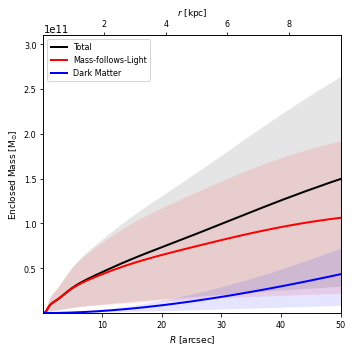

In [10]:
fig1 = plotter.mass_plot(which_chi2='kinchi2', Rmax_arcs=50, figtype=None)

The ``orbit_plot`` function generates a plot showing the stellar orbit distribution, described as probability density of orbits; circularity (lambda_z) is represented here as a function of the distance from the galactic centre r (in arcsec). You can specify the type of file you want to be saved with the figure (e.g., ``'.png'``, ``'.pdf'``, ...). In this case, ``Rmax_arcs`` represents the upper radial limit for orbit selection, in arcsec, meaning that only orbits extending up to ``Rmax_arcs`` are plotted.

[INFO] 16:16:37 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/orbit_linear_only.png saved in NGC6278_output/plots/


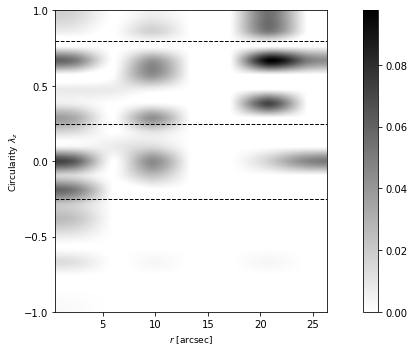

In [11]:
fig2 = plotter.orbit_plot(Rmax_arcs=50)

The ``beta_plot`` function generates two plots, showing the intrinsic and projected anisotropy profiles.

[INFO] 16:16:40 - dynamite.plotter.Plotter - Figure NGC6278_output/plots/anisotropy_var.png saved in NGC6278_output/plots/
[INFO] 16:16:40 - dynamite.plotter.Plotter - Figure NGC6278_output/plots/betaz_var.png saved in NGC6278_output/plots/


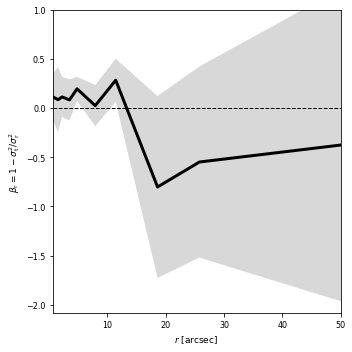

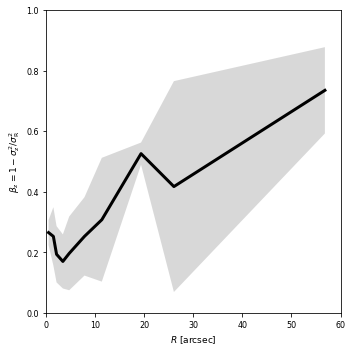

In [12]:
fig3, fig4 = plotter.beta_plot(which_chi2='kinchi2', Rmax_arcs=50)

The ``qpu_plot`` function creates a plot showing the intrinsic flattenings $q$ and $p$, with the blue and black lines respectively, as a function of the distance from the galactic centre (in arcsec). The value of $T = (1-p^2)/(1-q^2)$ is also shown (red line).

[INFO] 16:16:41 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/triaxial_qpt.png saved in NGC6278_output/plots/


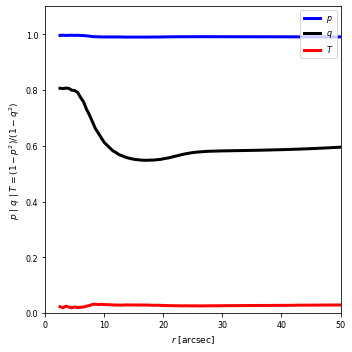

In [13]:
fig5 = plotter.qpu_plot(which_chi2='kinchi2', Rmax_arcs=50,figtype =None)